In [ ]:
# Predicting heart disease using machine learning
# 1 Problem Definition
# 2 Data
# 3 Evaluation
# 4 Features
# 5 Modelling
# 6 Experimentation

In [ ]:
# Preparing the tools
# Import all the tools we need
# Regular EDA(exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# we want out plots inside the notebook

#Models from SK learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score,f1_score,plot_roc_curve

In [ ]:
# Load Data
df=pd.read_csv("/content/heart-disease.csv")
df.shape

(303, 14)

In [ ]:
# Data Exploration (EDA)
# The goal here is to learn more about data

# 1] What questions u r trying to solve
# 2] What kind of data we have and how do we treat different types?
# 3] What's missing from your data and how do we deal with it?
# 4] What are outliers and why should you care about them?
# 5] How can you add,remove features to get more from your data?


In [ ]:
# Let's find out how many of each class are there?
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

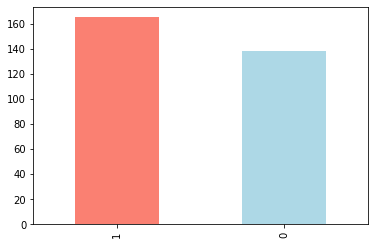

In [ ]:
df["target"].value_counts().plot(kind="bar",color=("salmon","lightblue"));

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# Heart disease frequency according to Sex
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [ ]:
pd.crosstab(df.target,df.sex) #0 is female 1 is male
# we could visualize that in woman 75 percent chance is there ,for heart disease to be present
# in male it is about 45 percent and overall is about 62.5 percent.


sex,0,1
target,,
0,24,114
1,72,93


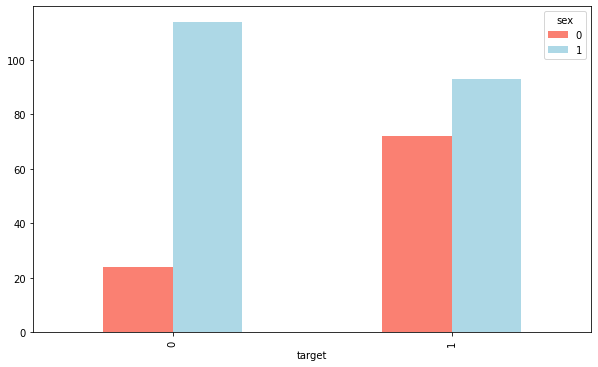

In [ ]:
# create a plot of crosstab
pd.crosstab(df.target,df.sex).plot(kind="bar",figsize=(10,6),color=("salmon","lightblue"));



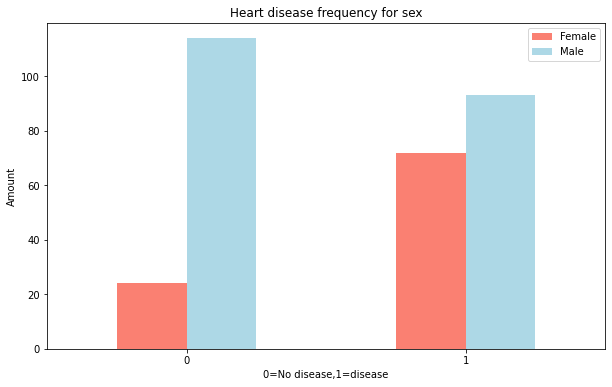

In [ ]:
pd.crosstab(df.target,df.sex).plot(kind="bar",figsize=(10,6),color=("salmon","lightblue"));
plt.title("Heart disease frequency for sex")
plt.xlabel("0=No disease,1=disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

In [ ]:
# Age vs Max Heart Rate (thalach) for heart disease
df["thalach"].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

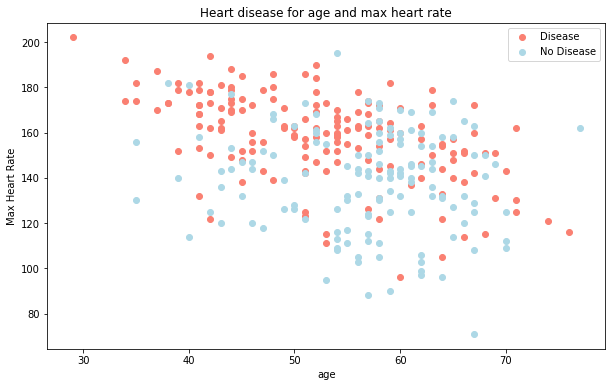

In [ ]:
# Create another plot
plt.figure(figsize=(10,6))

# Create Scatter for positive examples (91 samples are there for thalach so can't represent via bar)
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c="salmon");

# Create Scatter for negative examples
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c="lightblue");

# Add some useful info
plt.title("Heart disease for age and max heart rate")
plt.xlabel("age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"])

In [ ]:
df.age[df.target==1].value_counts()

54    10
51     9
41     9
52     9
44     8
57     7
42     7
58     7
45     6
53     6
64     6
43     5
59     5
56     5
65     4
62     4
46     4
66     4
50     4
48     4
55     3
60     3
47     3
39     3
67     3
63     3
71     3
49     3
37     2
34     2
35     2
69     2
68     2
38     2
40     1
29     1
61     1
74     1
76     1
70     1
Name: age, dtype: int64

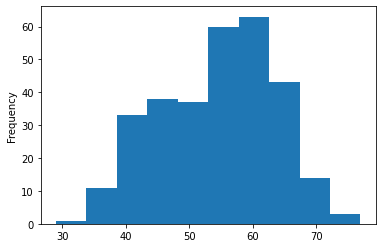

In [ ]:
# Check the distribution of the column with a histogram
df.age.plot.hist();

In [ ]:
df1=df["age"]>50
df1.value_counts()
#df1[df.target==1].value_counts()

True     208
False     95
Name: age, dtype: int64

In [ ]:
#Heart Disease Frequency per chest pain type
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


<ipython-input-26-2e2aa73d4283>:8: UserWarning: Legend does not support 'd' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend("disease","no disease")
<ipython-input-26-2e2aa73d4283>:8: UserWarning: Legend does not support 'i' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend("disease","no disease")
<ipython-input-26-2e2aa73d4283>:8: UserWarning: Legend does not support 's' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend("disease","no disease")
<ipython-input-26-2e2aa73d4283>:8: UserWarning: Legend does not support 'e' instances.
A proxy artist may be used instead.
See: http://matplotlib.or

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

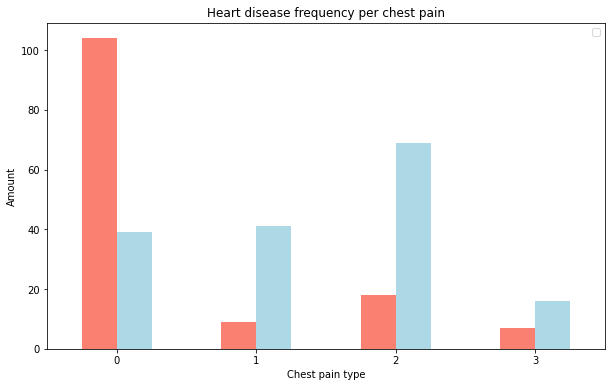

In [ ]:
# Make crosstab more visual
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,6),color=("salmon","lightblue"));

# Add some info
plt.title("Heart disease frequency per chest pain")
plt.xlabel("Chest pain type")
plt.ylabel("Amount")
plt.legend("disease","no disease")
plt.xticks(rotation=0)

In [ ]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


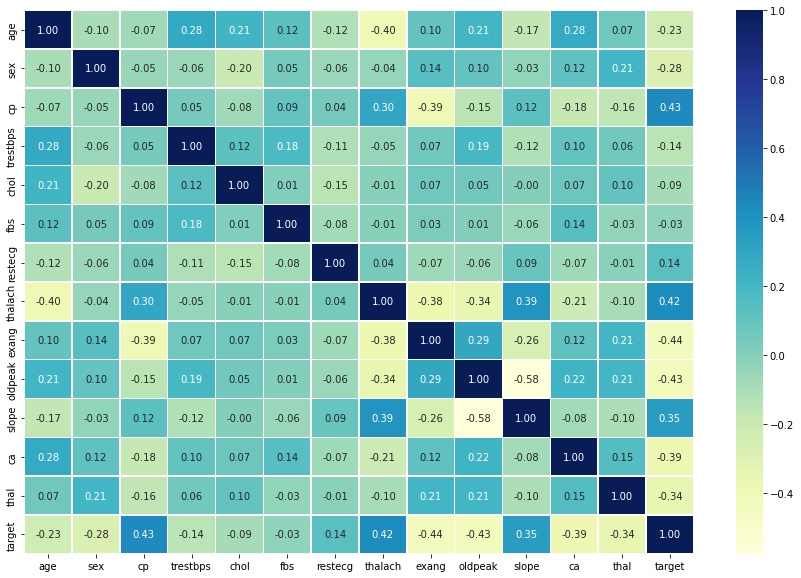

In [ ]:
# Let's make our correlation matrix more prettier
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu")

In [ ]:
# 5 Modelling

# Split the data
X=df.drop("target",axis=1)
y=df["target"]

# Split into train and test set
np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)



In [ ]:

# We are going to try 3 different models
# 1 Logistic Regression (model for classification)
# 2 k nearest neighbors
# 3 RandomForestClassifier

In [ ]:
# Making dictenory
models={"Logictic Regression": LogisticRegression(),
        "KNN":KNeighborsClassifier(),
        "Random Forest":RandomForestClassifier()}

#Create a function to fit and score models

def fit_and_score(models,X_train,X_test,y_train,y_test):
  #Fits and evaluates given machine learning models

  # Setup random seed
  np.random.seed(42)
  # Make a dictenory to keep model scores
  model_scores = {}
  #Loop through models
  for name,model in models.items():
    #Fit the model to data
    model.fit(X_train,y_train)
    #Evaluate the models and append its scores to model_scores
    model_scores[name]=model.score(X_test,y_test)
  return model_scores


In [ ]:
model_scores=fit_and_score(models=models,
                           X_train=X_train,
                           X_test=X_test,
                           y_train=y_train,
                           y_test=y_test)
model_scores

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logictic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

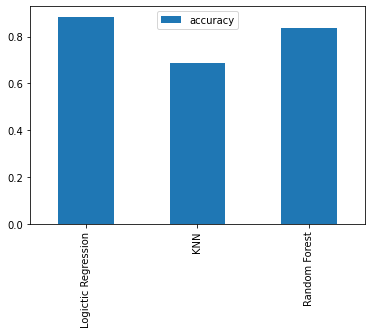

In [ ]:
# Model Comparison
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar();

In [ ]:
# Now as our baseline model is ready,let's look at following:
# Hyperparameter tuning
# Feature Importance
# Confusion Matrix
# Cross validation
# Recall
# Precision
# F1 score
# Classification Report
# Area under Curve
# ROC Curve

In [ ]:
# Hyperparameter tuning
# Let's tune KNN
train_scores=[]
test_scores=[]

# Create a list of different values for n neighbors
neighbors=range(1,21)

# Setup knn instance
knn=KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
  knn.set_params(n_neighbors=i)

  # Fit the algorithm
  knn.fit(X_train,y_train)

  # Update the training scores list
  train_scores.append(knn.score(X_train,y_train))

  # Update the test scores list
  test_scores.append(knn.score(X_test,y_test))


In [ ]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [ ]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data:75.41%


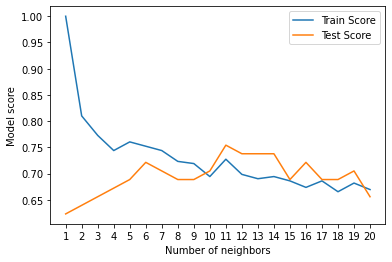

In [ ]:
plt.plot(neighbors,train_scores,label="Train Score")
plt.plot(neighbors,test_scores,label="Test Score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
print(f"Maximum KNN score on the test data:{max(test_scores)*100:.2f}%")

In [ ]:
# Hyperparameter tuning using Randomized Seach CV

 # We are going to tune : 1) Logistic Regression 2) RandomForestClassifier using RandomizedSearchCV

In [ ]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid={"C": np.logspace(-4,4,20),
              "solver":["liblinear"]}
# Create a hyperparameter grid for RandomForestClassifier grid
rf_grid={"n_estimators":np.arange(10,1000,50),
         "max_depth":[None,3,5,10],
         "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2)}


In [ ]:
# LogisticRegressionCV
#Let's tune them using RandomizedSearchCV

# Tune LogisticRegression
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                              param_distributions=log_reg_grid,
                              cv=5,n_iter=20,verbose=True)

# Fit the model
rs_log_reg.fit(X_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [ ]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

In [ ]:
# Let's tune randomforestclassifier
np.random.seed(42)
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                         param_distributions=rf_grid,
                         cv=5,n_iter=20,verbose=True)
# Fit the model
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [ ]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [ ]:
rs_rf.score(X_test,y_test)

0.8688524590163934

In [ ]:
# Hyperparameter tuning using GridSearchedCV

In [ ]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid={"C":np.logspace(-4,4,30),
              "solver":["liblinear"]}
# Set up grid hyperparameter search for LogisticRegression
gs_log_reg=GridSearchCV(LogisticRegression(),
                        param_grid=log_reg_grid,
                        cv=5,verbose=True)
#Fit the data
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [ ]:
#Check best hyperparams
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [ ]:
# evaluate
gs_log_reg.score(X_test,y_test)

0.8852459016393442

In [ ]:
# Evaluating our tuned machine learning classifier,beyond accuracy

# ROC Curve and AUC Curve
# Confusion Matrix
# Classification Report
# F1
# Precision
# Recall
# F1

# ... and it would be great if cross validation was used where possible


In [ ]:
# Make predictions with truth labels
y_preds=gs_log_reg.predict(X_test)

In [ ]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


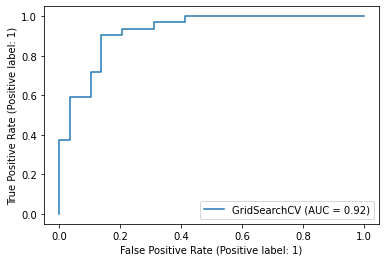

In [ ]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg,X_test,y_test)

In [ ]:
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


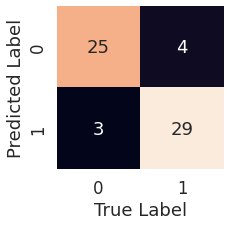

In [ ]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
  # Plots confusion matrix with seaborn heatmap
  fig,ax=plt.subplots(figsize=(3,3))
  ax=sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False)
  plt.xlabel("True Label")
  plt.ylabel("Predicted Label")
plot_conf_mat(y_test,y_preds)

In [ ]:
print(classification_report(y_test,y_preds)) # recall,precision,etc calculated on only set of test data

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [ ]:
# Calculate evaluation metrics using cross validation
# Check best hyperpara
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [ ]:
# Create a mew classifier with best hyperparameters
clf=LogisticRegression(C= 0.20433597178569418,
                       solver="liblinear")

In [ ]:
# Cross validated accuracy
cv_acc=cross_val_score(clf,X,y,scoring="accuracy")
np.mean(cv_acc)

0.8446994535519124

In [ ]:
# Cross validated precision
cv_pre=cross_val_score(clf,X,y,scoring="precision")
np.mean(cv_pre)

0.8207936507936507

In [ ]:
# Cross validated recall
cv_recall=cross_val_score(clf,X,y,scoring="recall")
np.mean(cv_recall)

0.9212121212121213

In [ ]:
# Cross validated F1
cv_f1=cross_val_score(clf,X,y,scoring="f1")
np.mean(cv_f1)


0.8673007976269721

In [ ]:
# Feature Importance
# Which features have contributed most to the output and how do they contribute?

# Finding feature importance is different for different machine learning models. One way is to search [model name]
# feature importance.
# Let's find feature importance for our LogisticRegression Model

In [ ]:

clf=LogisticRegression(C= 0.20433597178569418,
                       solver="liblinear")
clf.fit(X_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [ ]:
# Check coef (tells us how each variable contributes to target variable)
clf.coef_

array([[ 0.00320769, -0.86062049,  0.66001432, -0.01155971, -0.00166496,
         0.04017236,  0.31603405,  0.02458922, -0.60470171, -0.56795456,
         0.45085392, -0.63733328, -0.67555094]])

In [ ]:
# Match coef's of features to columns
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0032076883508599633,
 'sex': -0.8606204883695241,
 'cp': 0.660014324982524,
 'trestbps': -0.01155970600550047,
 'chol': -0.0016649614843449207,
 'fbs': 0.040172360271308105,
 'restecg': 0.31603405294617176,
 'thalach': 0.02458922341328129,
 'exang': -0.604701713592625,
 'oldpeak': -0.5679545646616215,
 'slope': 0.4508539209693025,
 'ca': -0.6373332766360461,
 'thal': -0.6755509369619848}

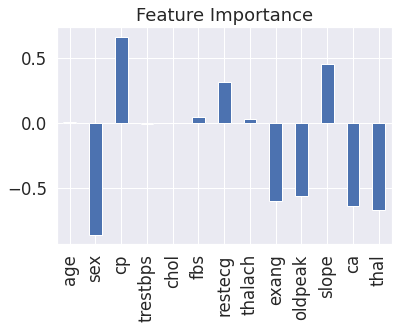

In [ ]:
#Visualize feature importnace
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend=False);